In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the Nifty50 data - Past 10 years- Daily data

In [2]:
df_Nifty = pd.read_csv('NIFTY 50_Data.csv')

In [3]:
df_Nifty.head()

,Date,Open,High,Low,Close
0,30 Oct 2020,11678.45,11748.95,11535.45,11642.40
1,29 Oct 2020,11633.30,11744.15,11606.45,11670.80
2,28 Oct 2020,11922.60,11929.40,11684.85,11729.60
3,27 Oct 2020,11807.10,11899.05,11723.00,11889.40
4,26 Oct 2020,11937.40,11942.85,11711.70,11767.75


In [4]:
df_Nifty.tail()

,Date,Open,High,Low,Close
2682,08 Jan 2010,5264.25,5276.75,5234.70,5244.75
2683,07 Jan 2010,5281.80,5302.55,5244.75,5263.10
2684,06 Jan 2010,5278.15,5310.85,5260.05,5281.80
2685,05 Jan 2010,5277.15,5288.35,5242.40,5277.90
2686,04 Jan 2010,5200.90,5238.45,5167.10,5232.20


In [5]:
df_Nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2687 entries, 0 to 2686
Data columns (total 5 columns):
Date     2687 non-null object
Open     2687 non-null float64
High     2687 non-null float64
Low      2687 non-null float64
Close    2687 non-null float64
dtypes: float64(4), object(1)
memory usage: 105.0+ KB


In [6]:
df_Nifty.shape

(2687, 5)

In [7]:
# Count of missing values from all columns
df_Nifty.isna().sum() 

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [8]:
df_Nifty.describe()

,Open,High,Low,Close
count,2687.000000,2687.000000,2687.000000,2687.000000
mean,7985.370153,8026.814700,7930.718143,7978.685709
std,2300.108222,2304.515287,2288.039456,2295.774054
min,4623.150000,4623.150000,4531.150000,4544.200000
25%,5744.250000,5781.875000,5691.800000,5741.375000
50%,7978.450000,8031.200000,7936.700000,7971.300000
75%,10176.125000,10225.925000,10120.175000,10160.975000
max,12430.500000,12430.500000,12321.400000,12362.300000


In [9]:
df_Nifty.describe(include = 'all')

,Date,Open,High,Low,Close
count,2687,2687.000000,2687.000000,2687.000000,2687.000000
unique,2687,NaN,NaN,NaN,NaN
top,08 Apr 2016,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7985.370153,8026.814700,7930.718143,7978.685709
std,NaN,2300.108222,2304.515287,2288.039456,2295.774054
min,NaN,4623.150000,4623.150000,4531.150000,4544.200000
25%,NaN,5744.250000,5781.875000,5691.800000,5741.375000
50%,NaN,7978.450000,8031.200000,7936.700000,7971.300000
75%,NaN,10176.125000,10225.925000,10120.175000,10160.975000


In [10]:
df_Nifty.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

# Exploratory Data Analysis

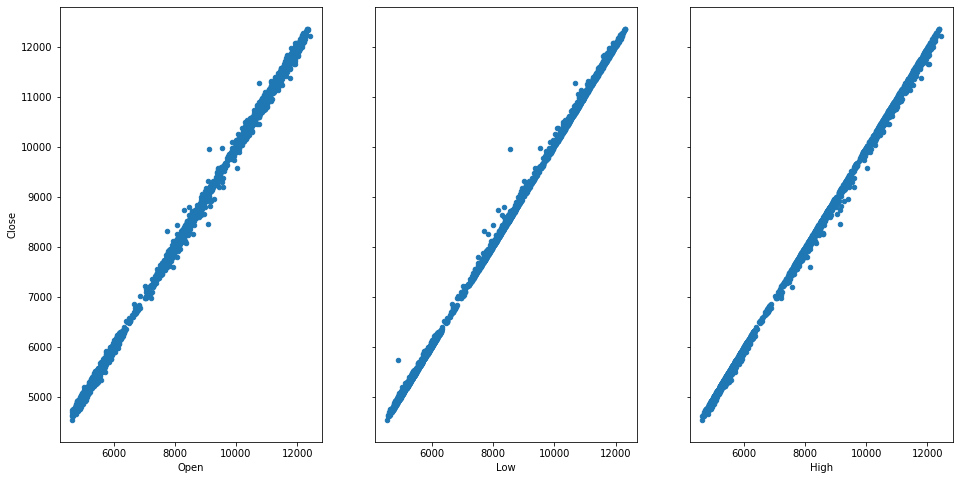

In [11]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
df_Nifty.plot(kind='scatter', x='Open', y='Close', ax=axs[0], figsize=(16, 8))
df_Nifty.plot(kind='scatter', x='Low', y='Close', ax=axs[1])
df_Nifty.plot(kind='scatter', x='High', y='Close', ax=axs[2])

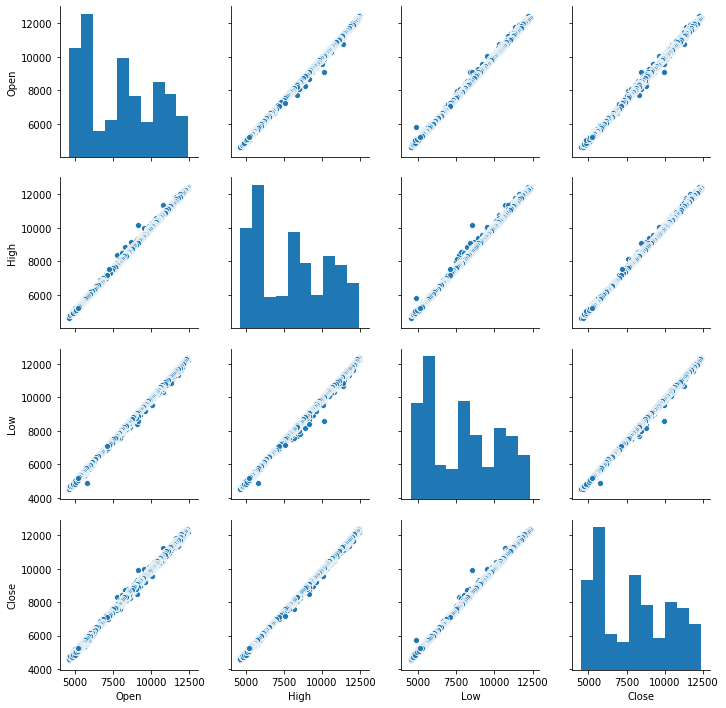

In [12]:
sns.pairplot(df_Nifty)

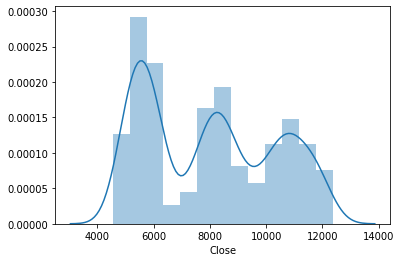

In [13]:
sns.distplot(df_Nifty['Close'])

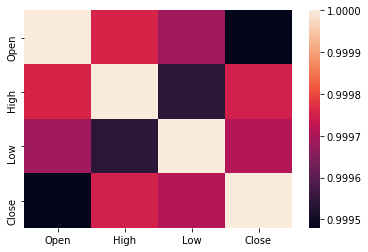

In [14]:
sns.heatmap(df_Nifty.corr())

## Training using Linear Regression Model

#### Inputs: Open, Low and High of Nifty50 daily data
#### Output: Predict the Close price (End of the day)

In [15]:
X = df_Nifty[['Open', 'High', 'Low']]
y = df_Nifty['Close']

### Train Test Split



In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Creating and Training the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
nifty50_lr_model = LinearRegression()

In [20]:
nifty50_lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Evaluating our Nifty50 Linear Regression Model

In [21]:
# print the intercept (c)
print(nifty50_lr_model.intercept_)

-2.89305668014822


In [22]:
# Print the Coefficients (m)
coeff_df = pd.DataFrame(nifty50_lr_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Open,-0.630189
High,0.871684
Low,0.758666


### Predictions from our Nifty50_Linear_Regression _model


In [23]:
predictions = nifty50_lr_model.predict(X_test)

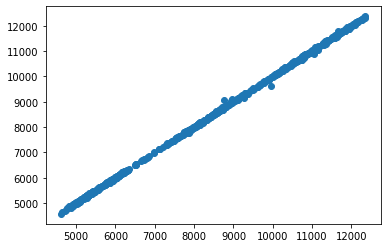

In [24]:
plt.scatter(y_test,predictions)

**Residual Histogram**

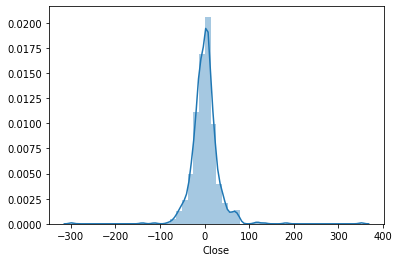

In [25]:
sns.distplot((y_test-predictions),bins=50);

#### Metrics and Accuracy

In [26]:
from sklearn import metrics

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19.89725567309226
MSE: 990.6229052969499
RMSE: 31.474162503503567


In [28]:
# Let's create a DataFrame since the model expects it
# Consider we predict for next day Close value of Nifty50 using below inputs
X_new = pd.DataFrame({'Open': [11642.4], 'Low': [11450], 'High': [11657]})
X_new.head()

,Open,Low,High
0,11642.4,11450,11657


In [29]:
# Using the Nifty50 Linear Regression Model
# To make predictions for the above inputs
print('Nifty50 Close : ', nifty50_lr_model.predict(X_new))

Nifty50 Close :  [11484.75287719]


In [30]:
# print the score of the model
nifty50_lr_model.score(X_test, y_test)

0.9998151322971077

In [31]:
print('Score of Nifty50 Model: ' ,nifty50_lr_model.score(X_test, y_test)*100,'%')

Score of Nifty50 Model:  99.98151322971077 %
